In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [170]:
df=pd.read_csv('loan_train.csv')


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [172]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
473,Female,No,0,Graduate,Yes,250000,0.0,9300000,360.0,NaN,Urban,Y
105,Male,Yes,1,Graduate,No,305200,103000.0,10000000,360.0,1.0,Urban,Y
66,Male,No,0,Not Graduate,No,320000,225400.0,12600000,180.0,0.0,Urban,N
178,Male,Yes,1,Graduate,No,375000,0.0,11600000,360.0,1.0,Semiurban,Y
79,Male,Yes,3+,Not Graduate,Yes,333300,216600.0,13000000,360.0,NaN,Semiurban,Y
366,Male,No,0,Graduate,No,250000,0.0,9600000,480.0,1.0,Semiurban,N
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N
16,Male,No,1,Not Graduate,No,359600,0.0,10000000,240.0,NaN,Urban,Y
330,Male,No,1,Graduate,No,438400,179300.0,11700000,360.0,1.0,Urban,Y
254,Male,No,0,Graduate,Yes,1625000,0.0,19200000,360.0,0.0,Urban,N


In [173]:
df.isnull().mean()*100

Gender                2.117264
Married               0.488599
Dependents            2.442997
Education             0.000000
Self_Employed         5.211726
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  2.280130
Credit_History        8.143322
Area                  0.000000
Status                0.000000
dtype: float64

In [174]:
df.duplicated().sum()

0

<Axes: ylabel='count'>

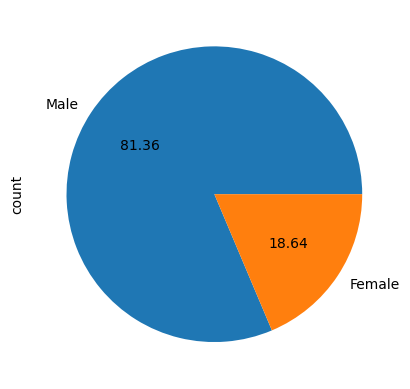

In [175]:
df['Gender'].value_counts().plot(kind="pie",autopct='%.2f')

<Axes: ylabel='count'>

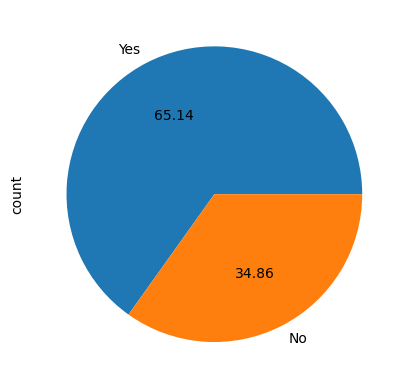

In [176]:
df['Married'].value_counts().plot(kind="pie",autopct='%.2f')

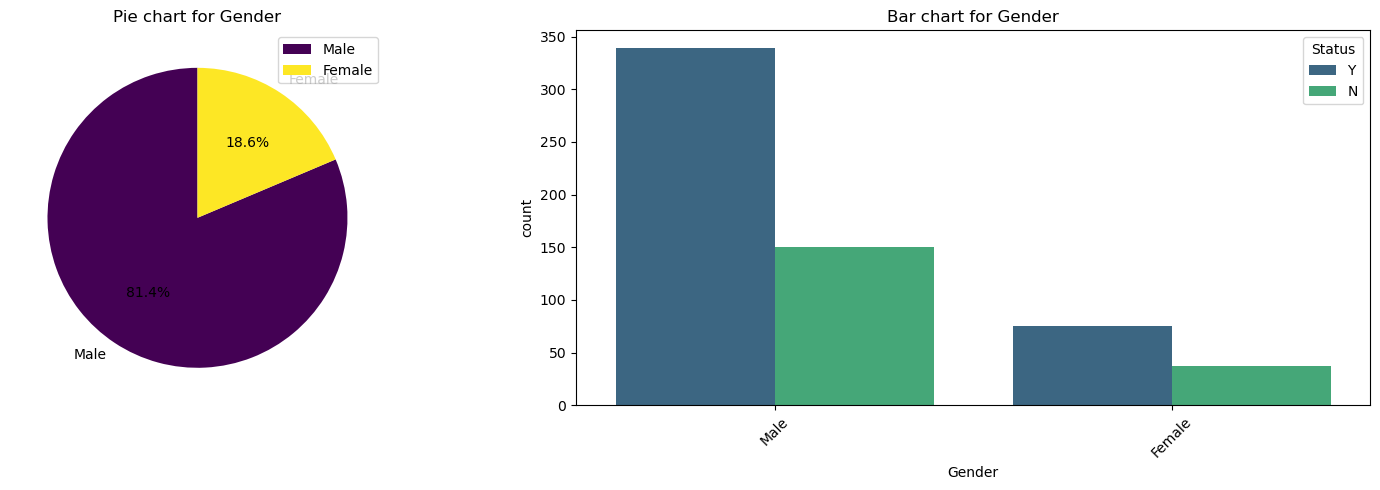

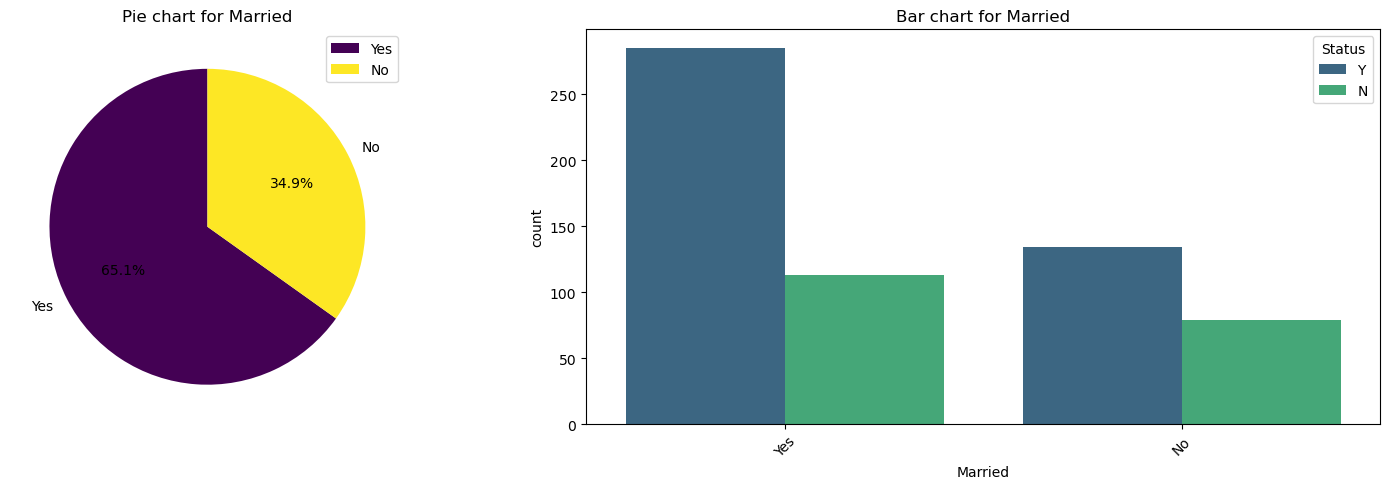

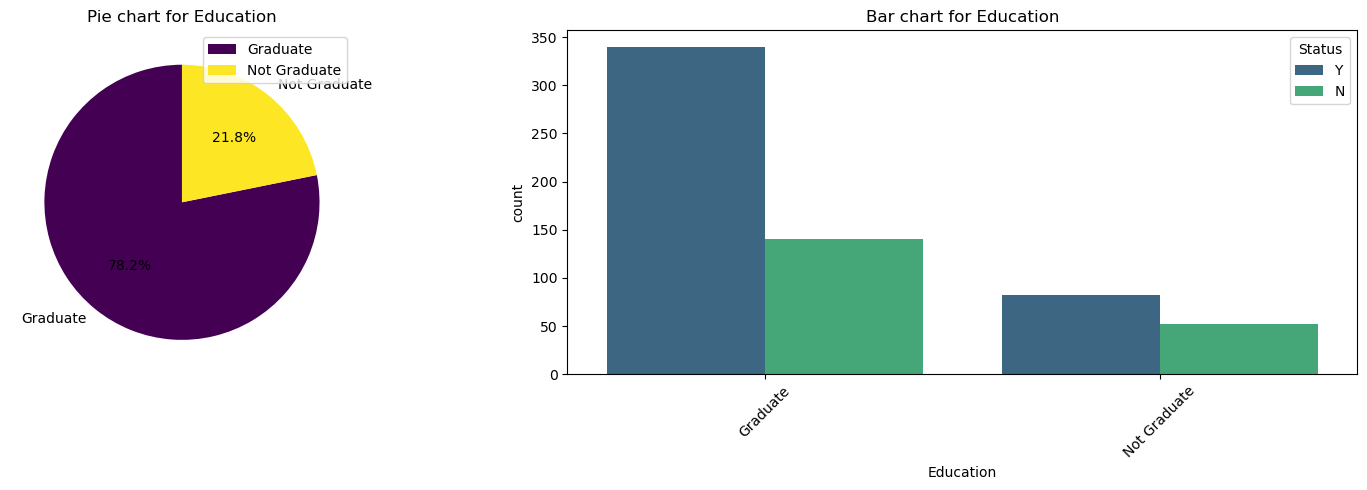

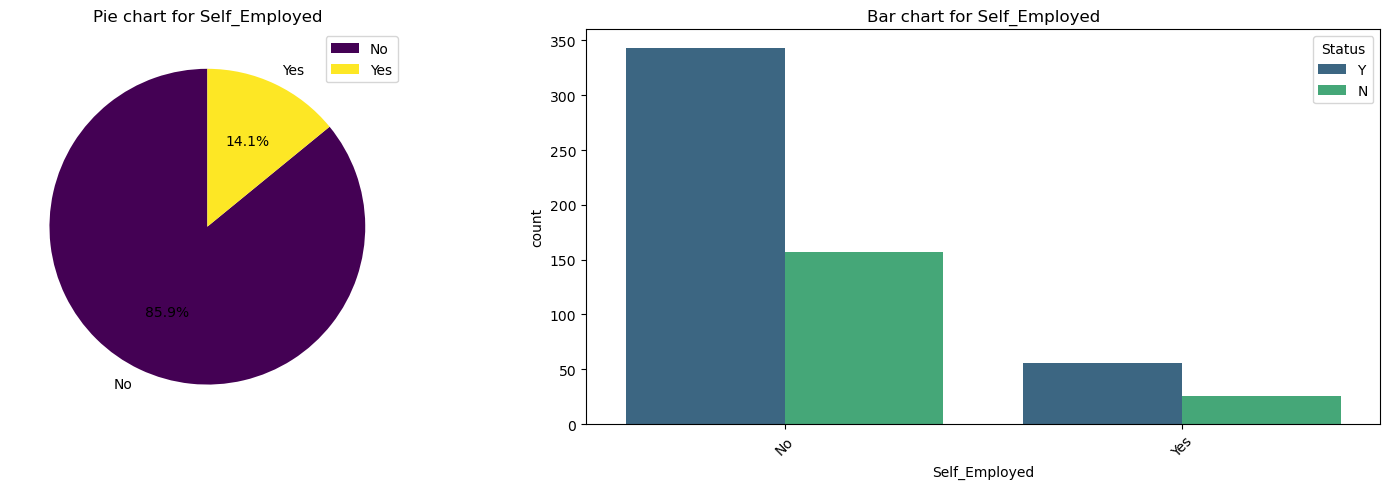

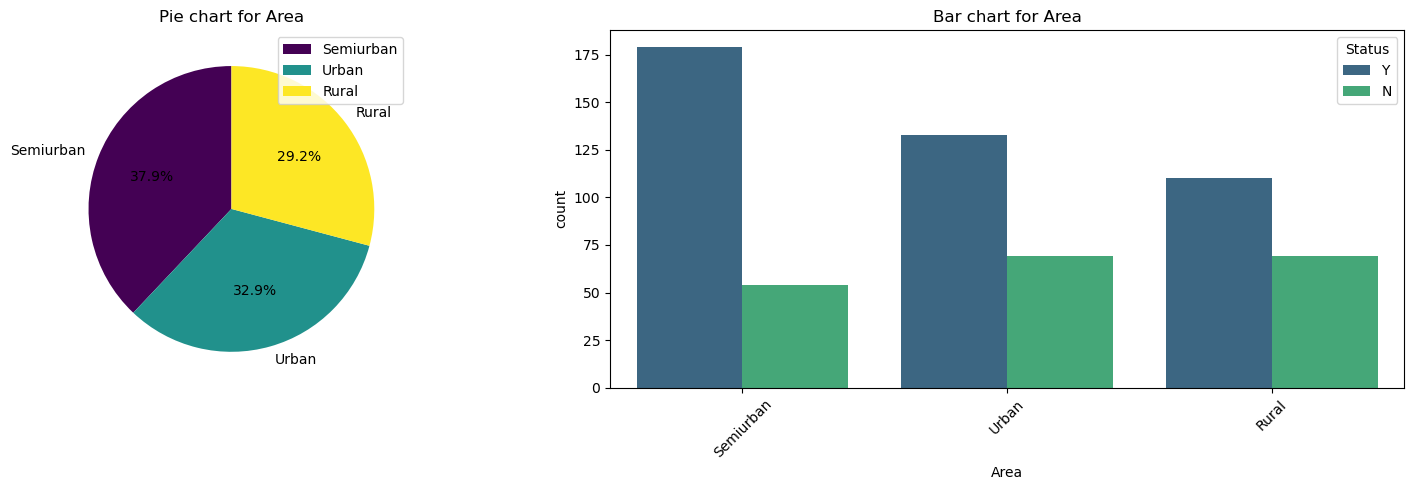

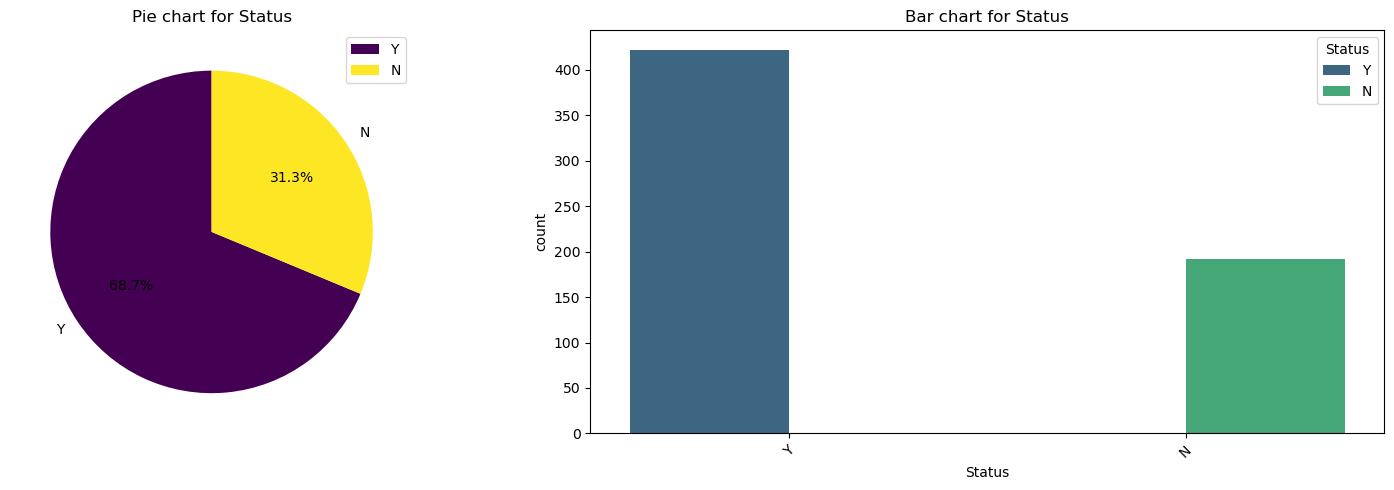

In [177]:
for col in cat:
        plt.figure(figsize=(16, 5))
        
        # Plot pie chart
        plt.subplot(1, 2, 1)
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', legend=True)
        plt.title(f'Pie chart for {col}')
        plt.ylabel('')  # Hide y-label to make the plot cleaner
        
        # Plot bar chart
        plt.subplot(1, 2, 2)
        sns.countplot(data=df, x=col, palette='viridis',hue=df['Status'], order=df[col].value_counts().index)
        plt.title(f'Bar chart for {col}')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

<Axes: ylabel='count'>

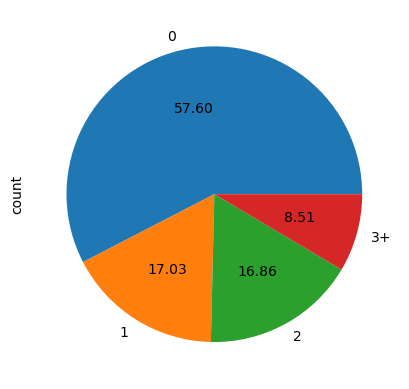

In [178]:
df['Dependents'].value_counts().plot(kind="pie",autopct='%.2f')

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


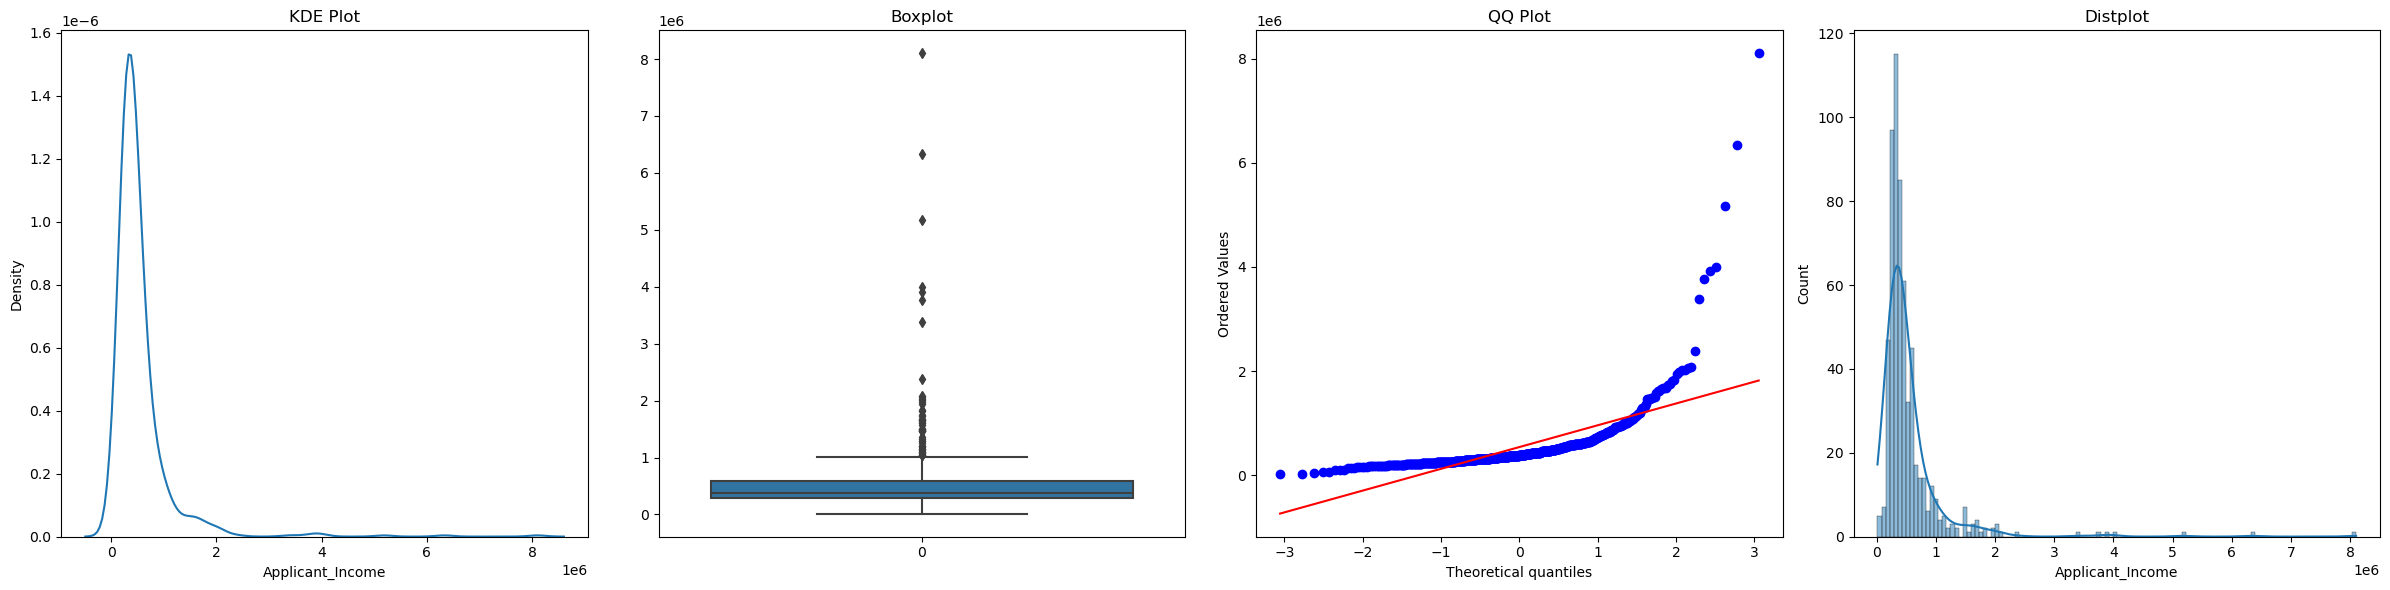

In [179]:
data = df['Applicant_Income']

# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# KDE plot
sns.kdeplot(data, ax=axes[0])
axes[0].set_title('KDE Plot')

# Boxplot
sns.boxplot(data, ax=axes[1])
axes[1].set_title('Boxplot')

# QQ plot
stats.probplot(data, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('r')
axes[2].set_title('QQ Plot')

# Distplot
sns.histplot(data, kde=True, ax=axes[3])
axes[3].set_title('Distplot')

plt.tight_layout()
plt.show()

In [180]:
df[df['Married']=='No']

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
13,Male,No,0,Graduate,No,185300,284000.0,11400000,360.0,1.0,Rural,N
15,Male,No,0,Graduate,No,495000,0.0,12500000,360.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,359600,0.0,10000000,240.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
597,Male,No,NaN,Graduate,No,298700,0.0,8800000,360.0,0.0,Semiurban,N
600,Female,No,3+,Graduate,NaN,41600,4166700.0,35000000,180.0,NaN,Urban,N
603,Male,No,0,Graduate,No,367600,430100.0,17200000,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y


# imputing missing value


In [181]:
df.sample()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
244,Male,Yes,0,Not Graduate,No,340600,441700.0,12300000,360.0,1.0,Semiurban,Y


In [182]:
cat=['Gender','Married','Education','Self_Employed','Area','Status']
num=['Dependents','Applicant_Income','Coapplicant_Income','Loan_Amount','Term','Credit_History']

In [183]:
df.isnull().mean()*100

Gender                2.117264
Married               0.488599
Dependents            2.442997
Education             0.000000
Self_Employed         5.211726
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  2.280130
Credit_History        8.143322
Area                  0.000000
Status                0.000000
dtype: float64

In [184]:
# cat imputing
mode_value=df['Gender'].mode()


<Axes: xlabel='Gender', ylabel='count'>

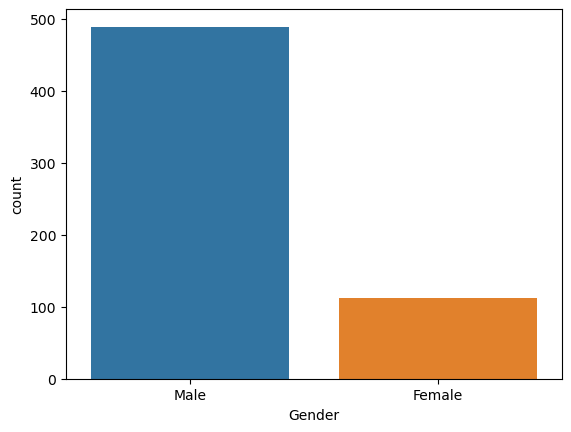

In [185]:
sns.countplot(x=df['Gender'])

In [186]:
mode_value = df['Gender'].mode()[0]
df['Gender'].fillna(mode_value, inplace=True)

In [187]:
df['Gender'].isnull().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

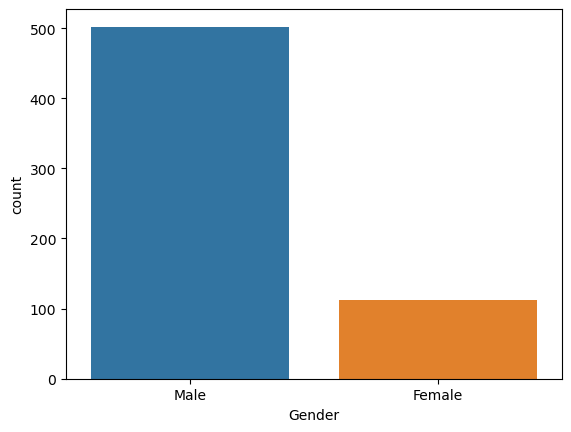

In [188]:
sns.countplot(x=df['Gender'])

In [189]:
mode_value = df['Married'].mode()[0]
df['Married'].fillna(mode_value, inplace=True)

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


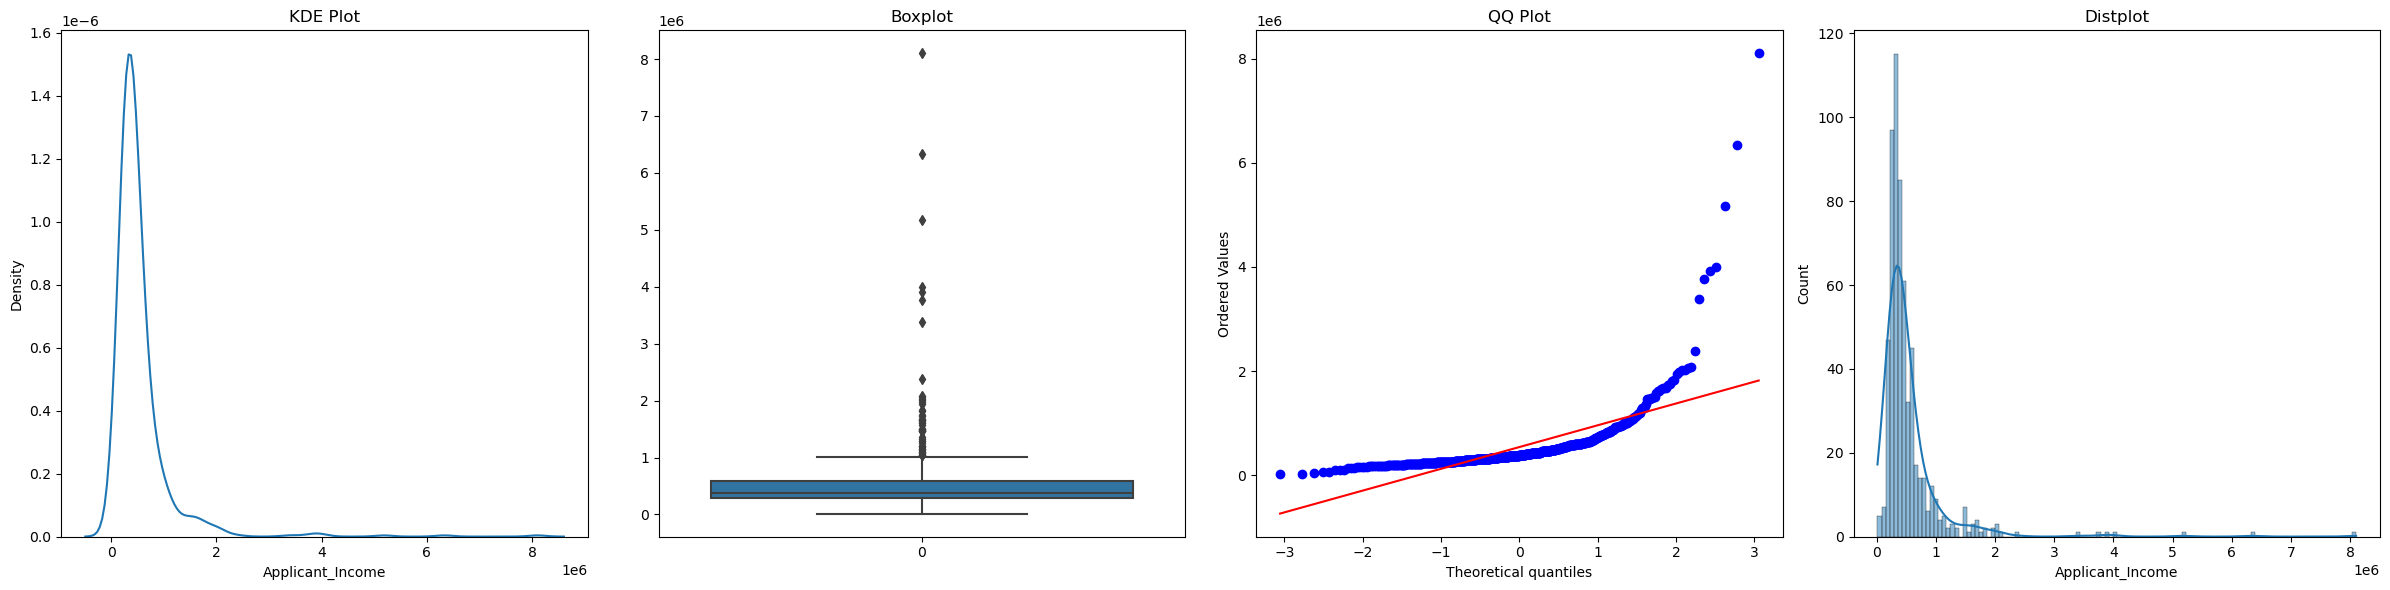

In [190]:

# Extract the column
data = df['Applicant_Income']

# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# KDE plot
sns.kdeplot(data, ax=axes[0])
axes[0].set_title('KDE Plot')

# Boxplot
sns.boxplot(data, ax=axes[1])
axes[1].set_title('Boxplot')

# QQ plot
stats.probplot(data, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('r')
axes[2].set_title('QQ Plot')

# Distplot
sns.histplot(data, kde=True, ax=axes[3])
axes[3].set_title('Distplot')

plt.tight_layout()
plt.show()


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


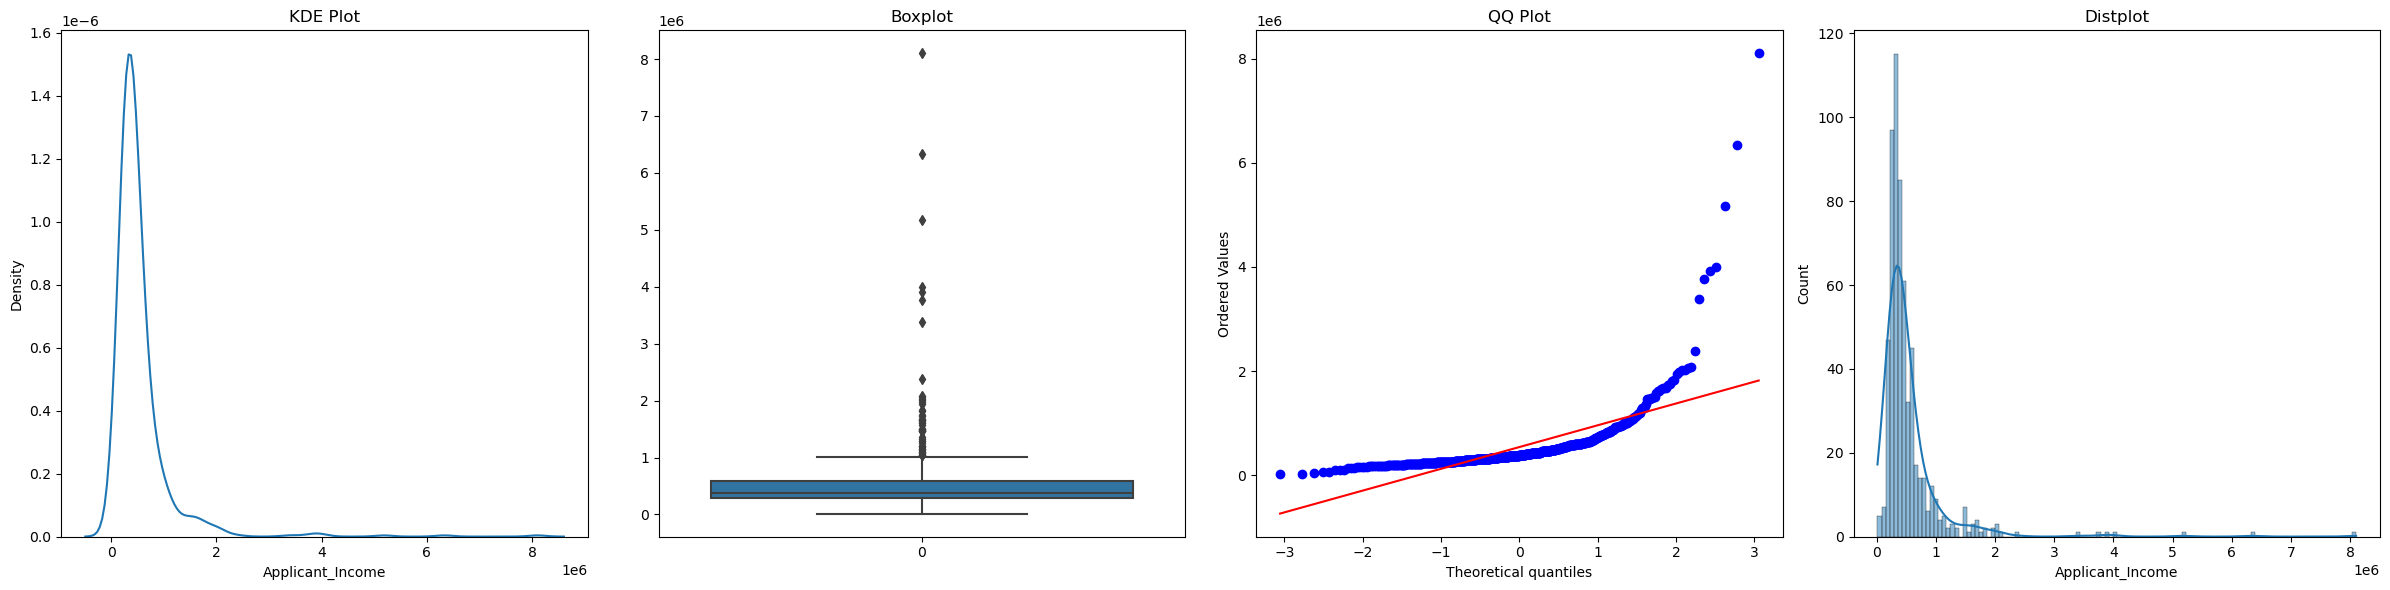

In [191]:
data = df['Applicant_Income']

# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# KDE plot
sns.kdeplot(data, ax=axes[0])
axes[0].set_title('KDE Plot')

# Boxplot
sns.boxplot(data, ax=axes[1])
axes[1].set_title('Boxplot')

# QQ plot
stats.probplot(data, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('r')
axes[2].set_title('QQ Plot')

# Distplot
sns.histplot(data, kde=True, ax=axes[3])
axes[3].set_title('Distplot')

plt.tight_layout()
plt.show()


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


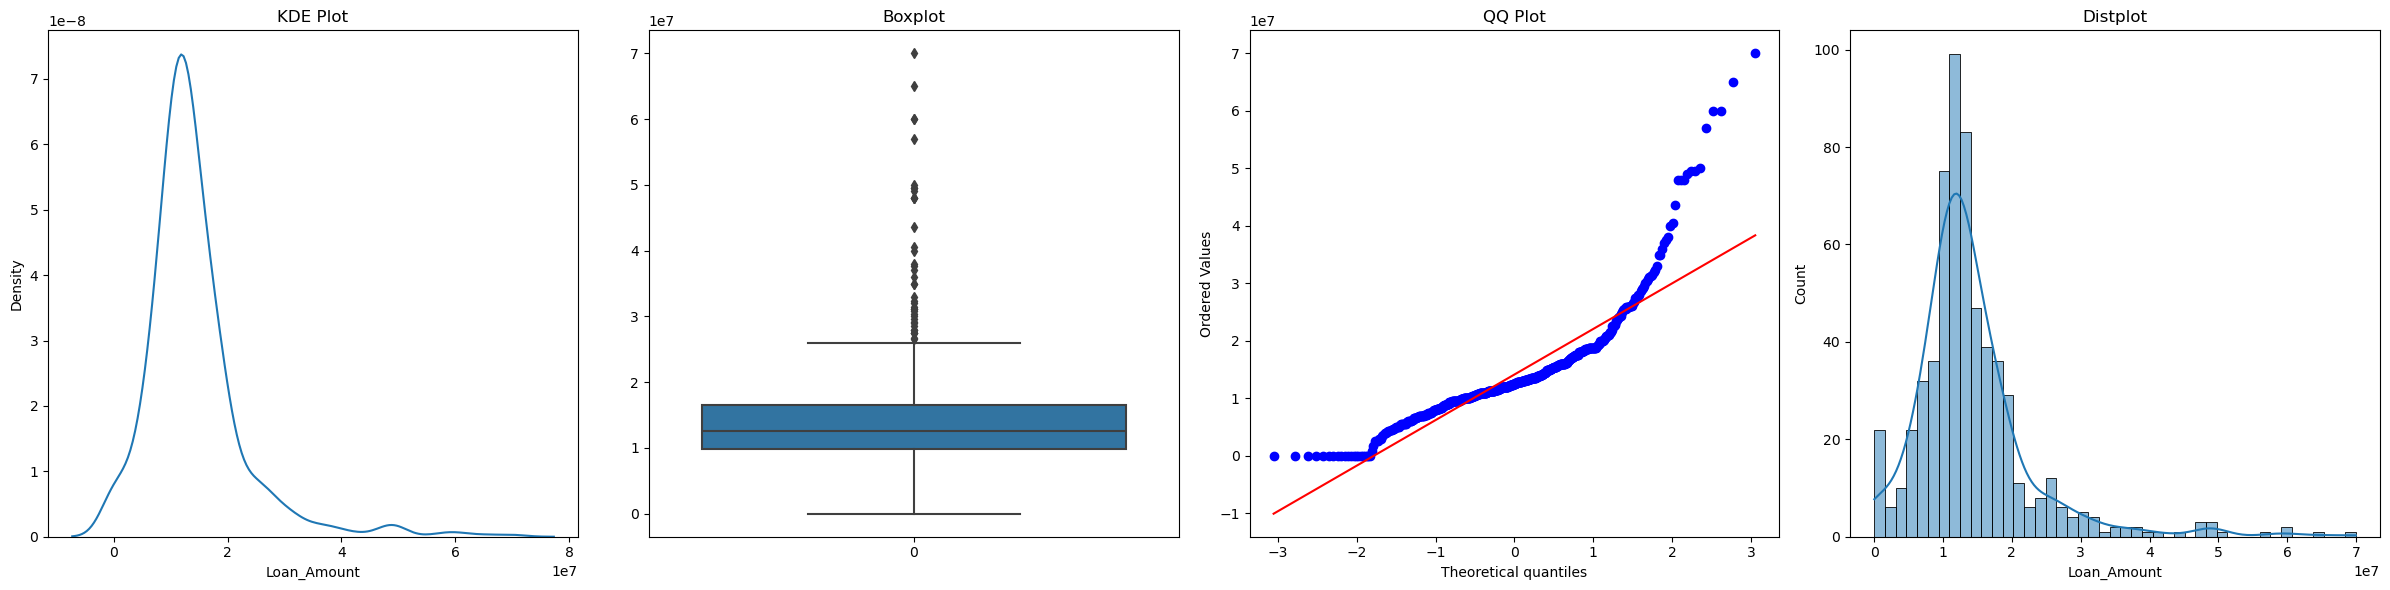

In [192]:
data = df['Loan_Amount']

# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# KDE plot
sns.kdeplot(data, ax=axes[0])
axes[0].set_title('KDE Plot')

# Boxplot
sns.boxplot(data, ax=axes[1])
axes[1].set_title('Boxplot')

# QQ plot
stats.probplot(data, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('r')
axes[2].set_title('QQ Plot')

# Distplot
sns.histplot(data, kde=True, ax=axes[3])
axes[3].set_title('Distplot')

plt.tight_layout()
plt.show()


<Axes: xlabel='Credit_History', ylabel='count'>

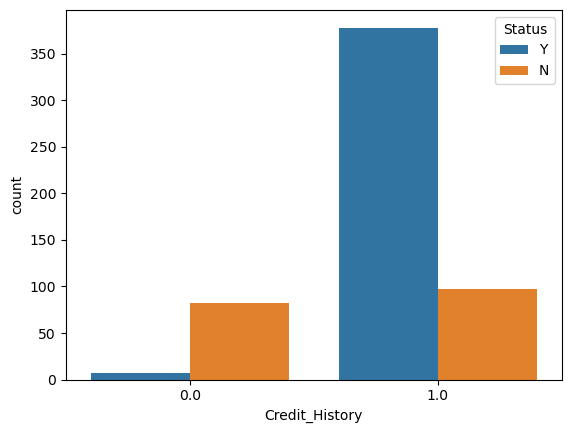

In [193]:
sns.countplot(data=df,x='Credit_History',hue='Status')

# bivariate analysis


In [194]:
df.sample()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
584,Male,Yes,1,Graduate,No,278700,191700.0,14600000,360.0,0.0,Rural,N


In [195]:
num=['Applicant_Income','Coapplicant_Income','Loan_Amount','Term','Credit_History']

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

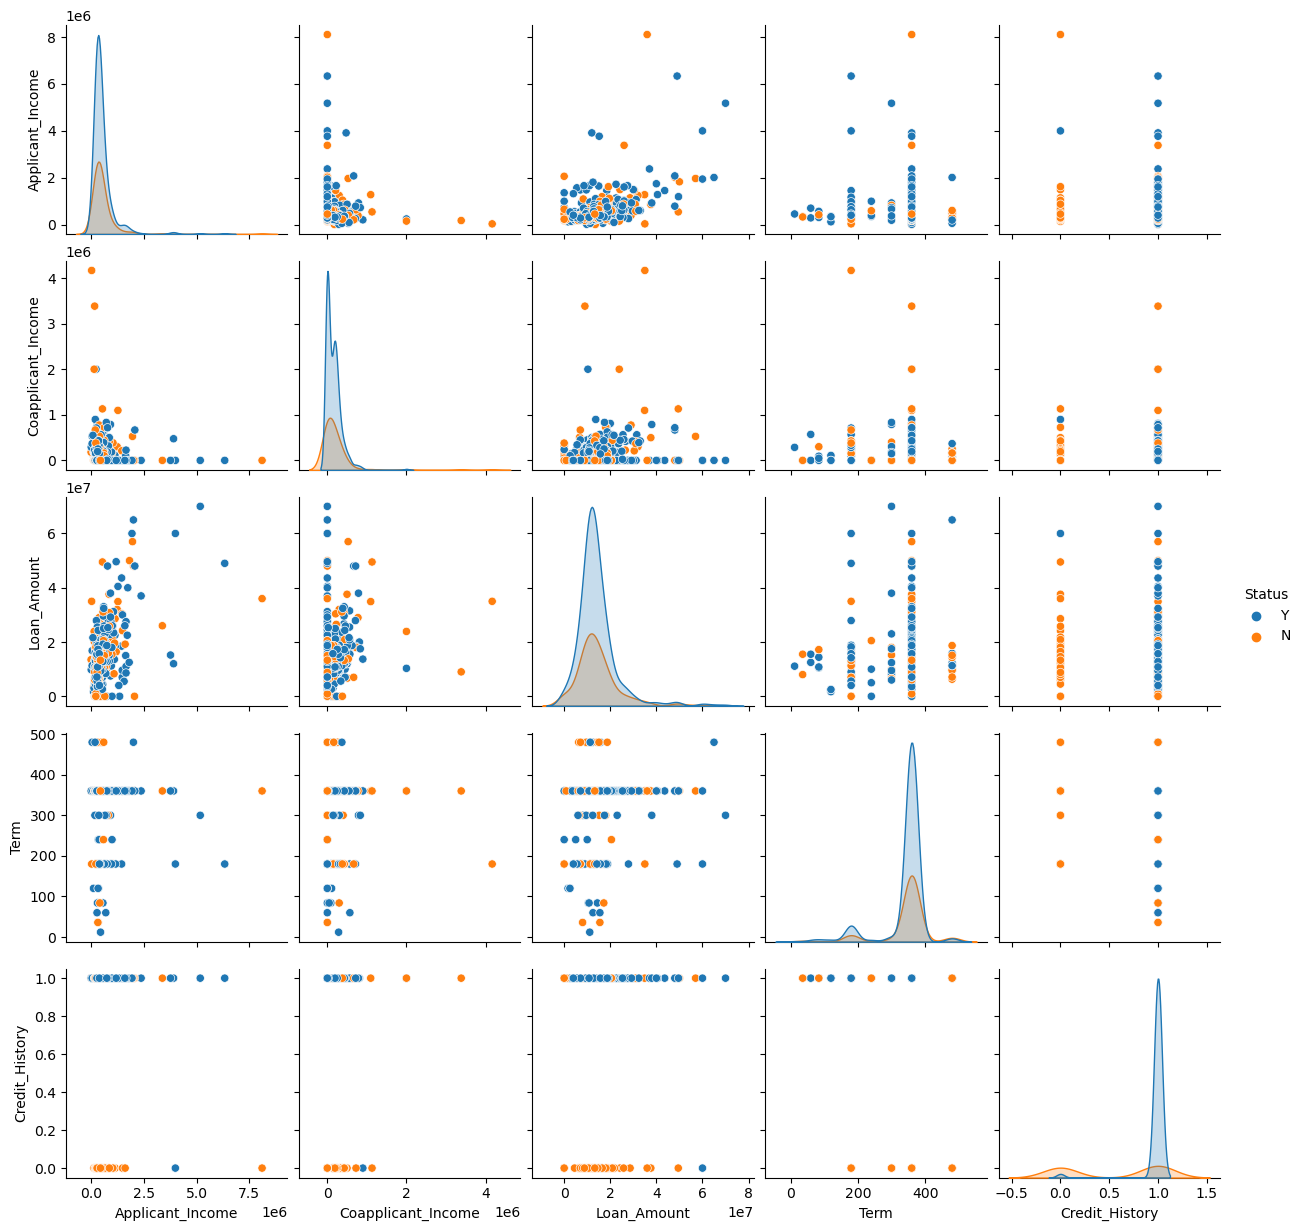

In [209]:
sns.pairplot(data=df,hue='Status')

# pandas proflingh

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\lenovo\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Urban'')
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\lenovo\anaconda3\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(mi

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

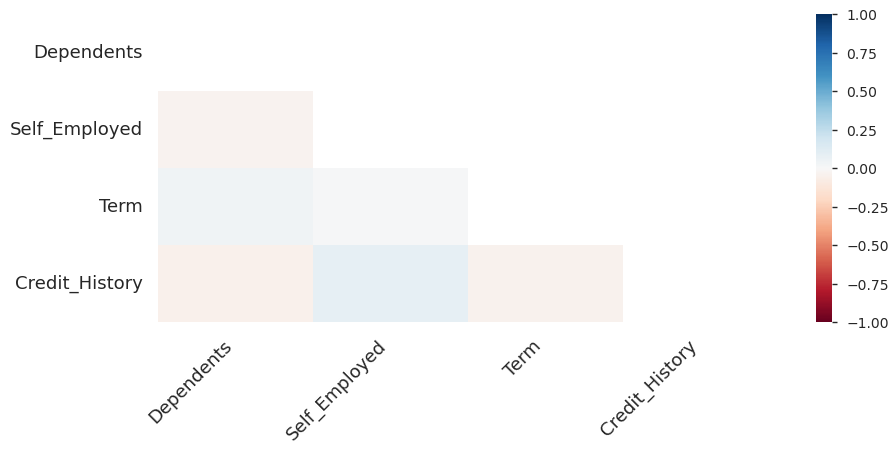

In [210]:
from ydata_profiling import ProfileReport
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

# misiing  value

In [196]:
df['Dependents']=df['Dependents'].replace('3+','3')

In [197]:
mode_value = df['Dependents'].mode()[0]  # Calculate mode of the column
mode_value

'0'

In [198]:
df['Dependents'].fillna(mode_value, inplace=True)

In [199]:
df['Dependents'].isna().sum()

0

In [200]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
250,Male,Yes,0,Not Graduate,No,166800,389000.0,20100000,360.0,0.0,Semiurban,N
217,Male,Yes,0,Graduate,No,372700,177500.0,13100000,360.0,1.0,Semiurban,Y
224,Male,Yes,0,Graduate,No,625000,0.0,12800000,360.0,1.0,Semiurban,Y
360,Female,No,1,Graduate,No,472300,0.0,8100000,360.0,1.0,Semiurban,N
127,Male,No,0,Graduate,No,386500,164000.0,0,360.0,1.0,Rural,Y
581,Male,No,0,Graduate,No,183600,3383700.0,9000000,360.0,1.0,Urban,N
339,Female,No,0,Graduate,No,416000,0.0,7100000,360.0,1.0,Semiurban,Y
11,Male,Yes,2,Graduate,NaN,250000,184000.0,10900000,360.0,1.0,Urban,Y
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
275,Male,Yes,1,Graduate,No,275000,184200.0,11500000,360.0,1.0,Semiurban,Y


In [201]:
mode_value = df['Self_Employed'].mode()[0]  # Calculate mode of the column
mode_value

'No'

In [202]:
df['Self_Employed'].fillna(mode_value, inplace=True)

In [203]:
df['Self_Employed'].isna().sum()

0

In [204]:
mode_value = df['Term'].mode()[0]  # Calculate mode of the column
mode_value

360.0

In [205]:
df['Term'].fillna(mode_value, inplace=True)

In [206]:
df['Term'].isna().sum()

0

In [207]:
mode_value = df['Credit_History'].mode()[0]  # Calculate mode of the column
mode_value

1.0

# feature selection

In [208]:
df.sample()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
562,Male,Yes,0,Graduate,No,592300,205400.0,21100000,360.0,1.0,Rural,Y


In [209]:
new_df=df


In [210]:
new_df['Gender']=new_df['Gender'].replace({'Male':1,
                   'Female':0})
new_df['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [211]:
new_df['Gender']=new_df['Gender'].replace({'Male':1,
                   'Female':0})
new_df['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [212]:
new_df['Gender']=new_df['Gender'].replace({'Male':1,
                   'Female':0})
new_df['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [213]:
new_df['Education']=new_df['Education'].replace({'Graduate':1,
                   'Not Graduate':0})
new_df['Education'].head()

0    1
1    1
2    1
3    0
4    1
Name: Education, dtype: int64

In [214]:
new_df['Self_Employed']=new_df['Self_Employed'].replace({'Yes':1,
                   'No':0})
new_df['Self_Employed'].head()

0    0
1    0
2    1
3    0
4    0
Name: Self_Employed, dtype: int64

In [215]:
new_df['Married']=new_df['Married'].replace({'Yes':1,
                   'No':0})
new_df['Married'].head()

0    0
1    1
2    1
3    1
4    0
Name: Married, dtype: int64

In [216]:
new_df['Area']=new_df['Area'].replace({'Rural':0,
                   'Urban':1,
                    'Semiurban':2})
new_df['Area'].head()

0    1
1    0
2    1
3    1
4    1
Name: Area, dtype: int64

In [217]:
new_df['Area'].unique

<bound method Series.unique of 0      1
1      0
2      1
3      1
4      1
      ..
609    0
610    0
611    1
612    1
613    2
Name: Area, Length: 614, dtype: int64>

In [218]:
new_df['Status']=new_df['Status'].replace({'Y':1,
                   'N':0})
new_df['Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Status, dtype: int64

In [219]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,1,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,1,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,1,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,1,1


In [220]:
new_df.corr()['Status']

Gender                0.017987
Married               0.091478
Dependents            0.010118
Education             0.085884
Self_Employed        -0.003700
Applicant_Income     -0.004710
Coapplicant_Income   -0.059187
Loan_Amount          -0.008782
Term                 -0.022549
Credit_History        0.561678
Area                  0.137545
Status                1.000000
Name: Status, dtype: float64

In [221]:
# outlier removal

In [222]:
percentile25=df['Applicant_Income'].quantile(0.25)
percentile75=df['Applicant_Income'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile75-1.5*iqr

In [223]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 1017125.0
Lower limit 141875.0


In [224]:
df[df['Applicant_Income']<lower_limit]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
14,1,1,2,1,0,129900,108600.0,1700000,120.0,1.0,1,1
77,1,1,1,1,1,100000,302200.0,11000000,360.0,1.0,1,0
82,0,1,2,1,0,137800,188100.0,16700000,360.0,1.0,1,0
188,1,1,0,1,1,67400,529600.0,16800000,360.0,1.0,0,1
216,1,1,0,1,0,15000,180000.0,13500000,360.0,1.0,0,0
418,1,1,0,1,0,102500,277300.0,11200000,360.0,1.0,0,1
468,0,1,2,0,0,21000,291700.0,9800000,360.0,1.0,2,1
500,0,0,0,1,0,64500,368300.0,11300000,480.0,1.0,0,1
530,1,1,0,1,0,102500,550000.0,21600000,360.0,NaN,0,1
600,0,0,3,1,0,41600,4166700.0,35000000,180.0,NaN,1,0


In [225]:


df['Applicant_Income'] = np.where(
    df['Applicant_Income'] > upper_limit,
    upper_limit,
    np.where(
        df['Applicant_Income'] < lower_limit,
        lower_limit,
        df['Applicant_Income']
    )
)

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


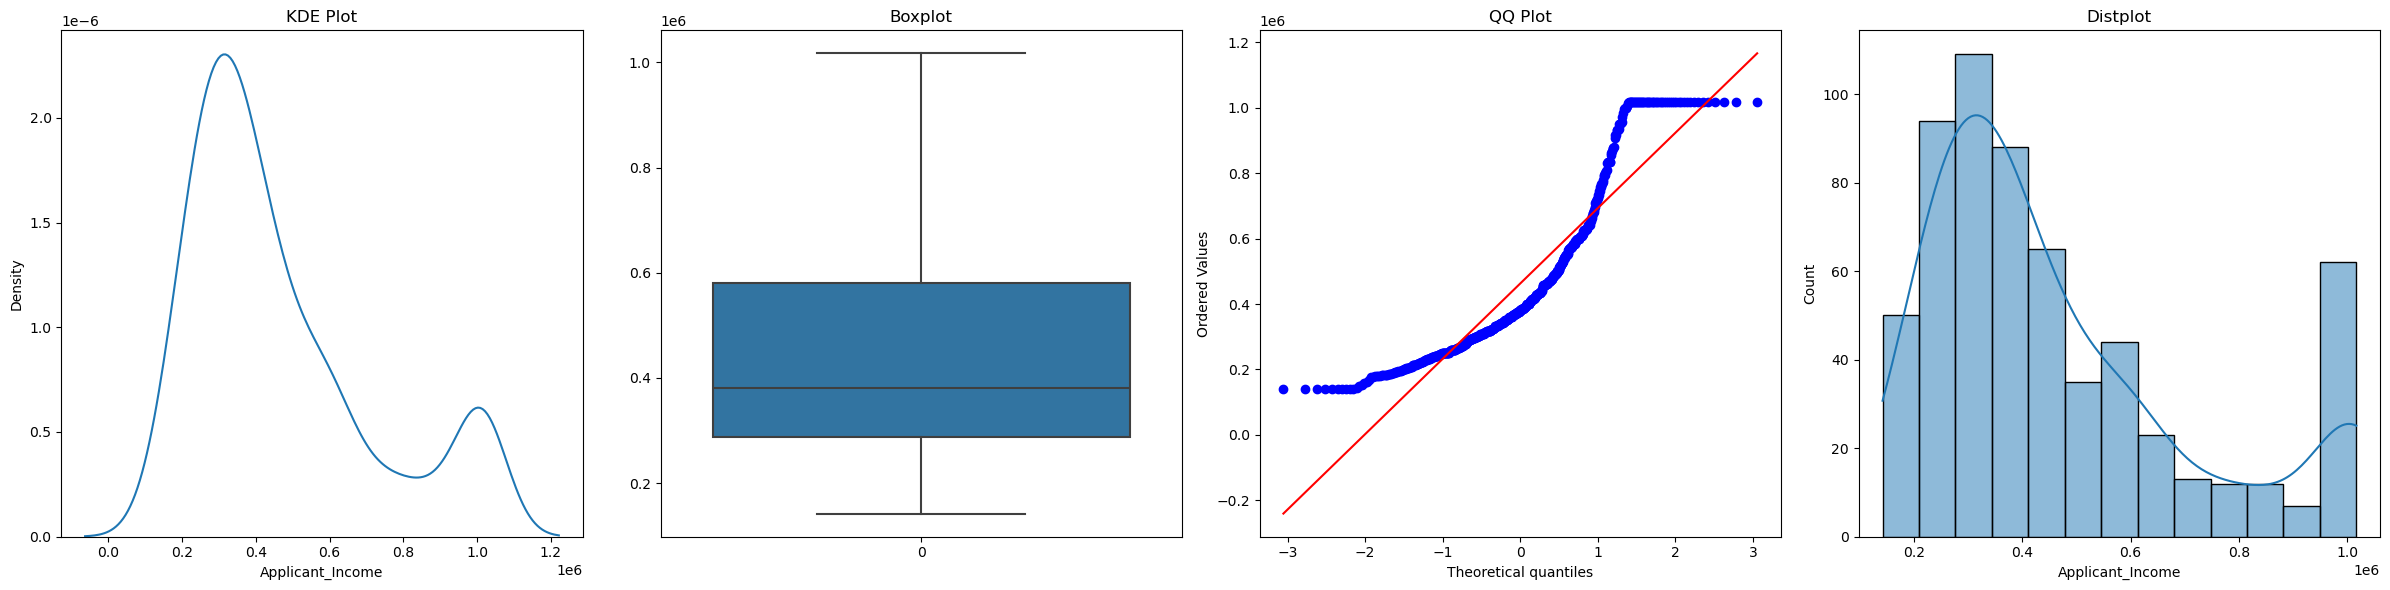

In [226]:
data = df['Applicant_Income']

# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# KDE plot
sns.kdeplot(data, ax=axes[0])
axes[0].set_title('KDE Plot')

# Boxplot
sns.boxplot(data, ax=axes[1])
axes[1].set_title('Boxplot')

# QQ plot
stats.probplot(data, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('r')
axes[2].set_title('QQ Plot')

# Distplot
sns.histplot(data, kde=True, ax=axes[3])
axes[3].set_title('Distplot')

plt.tight_layout()
plt.show()


In [227]:
percentile25=df['Loan_Amount'].quantile(0.25)
percentile75=df['Loan_Amount'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile75-1.5*iqr

In [228]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 26487500.0
Lower limit 6462500.0


In [229]:
df['Loan_Amount'] = np.where(
    df['Loan_Amount'] > upper_limit,
    upper_limit,
    np.where(
        df['Loan_Amount'] < lower_limit,
        lower_limit,
        df['Loan_Amount']
    )
)

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


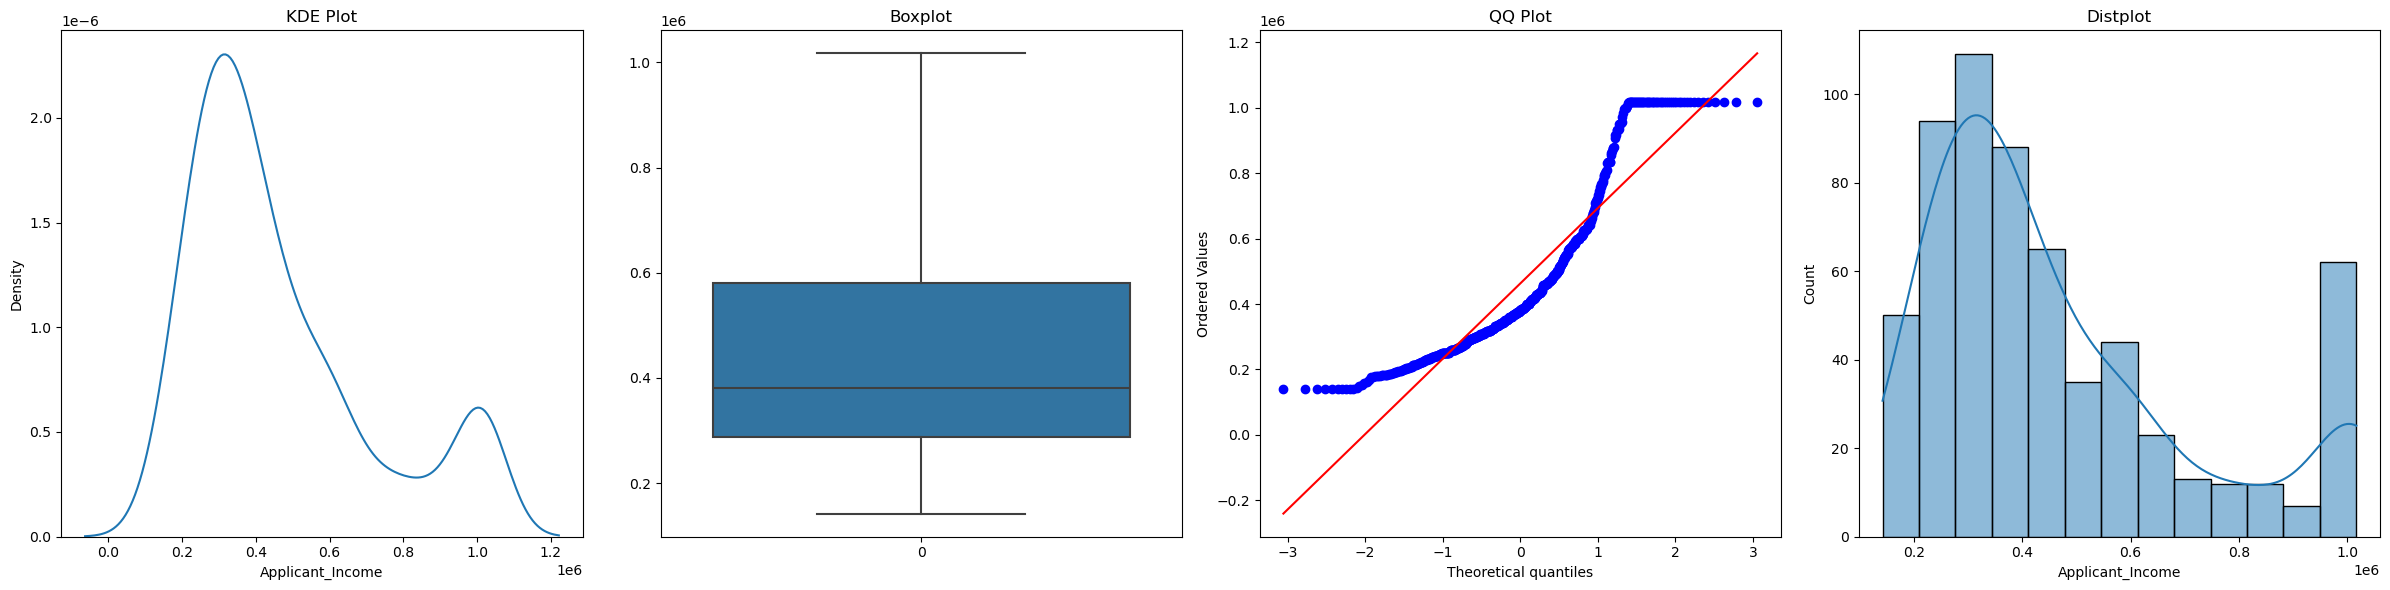

In [230]:
data = df['Applicant_Income']

# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# KDE plot
sns.kdeplot(data, ax=axes[0])
axes[0].set_title('KDE Plot')

# Boxplot
sns.boxplot(data, ax=axes[1])
axes[1].set_title('Boxplot')

# QQ plot
stats.probplot(data, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('r')
axes[2].set_title('QQ Plot')

# Distplot
sns.histplot(data, kde=True, ax=axes[3])
axes[3].set_title('Distplot')

plt.tight_layout()
plt.show()


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


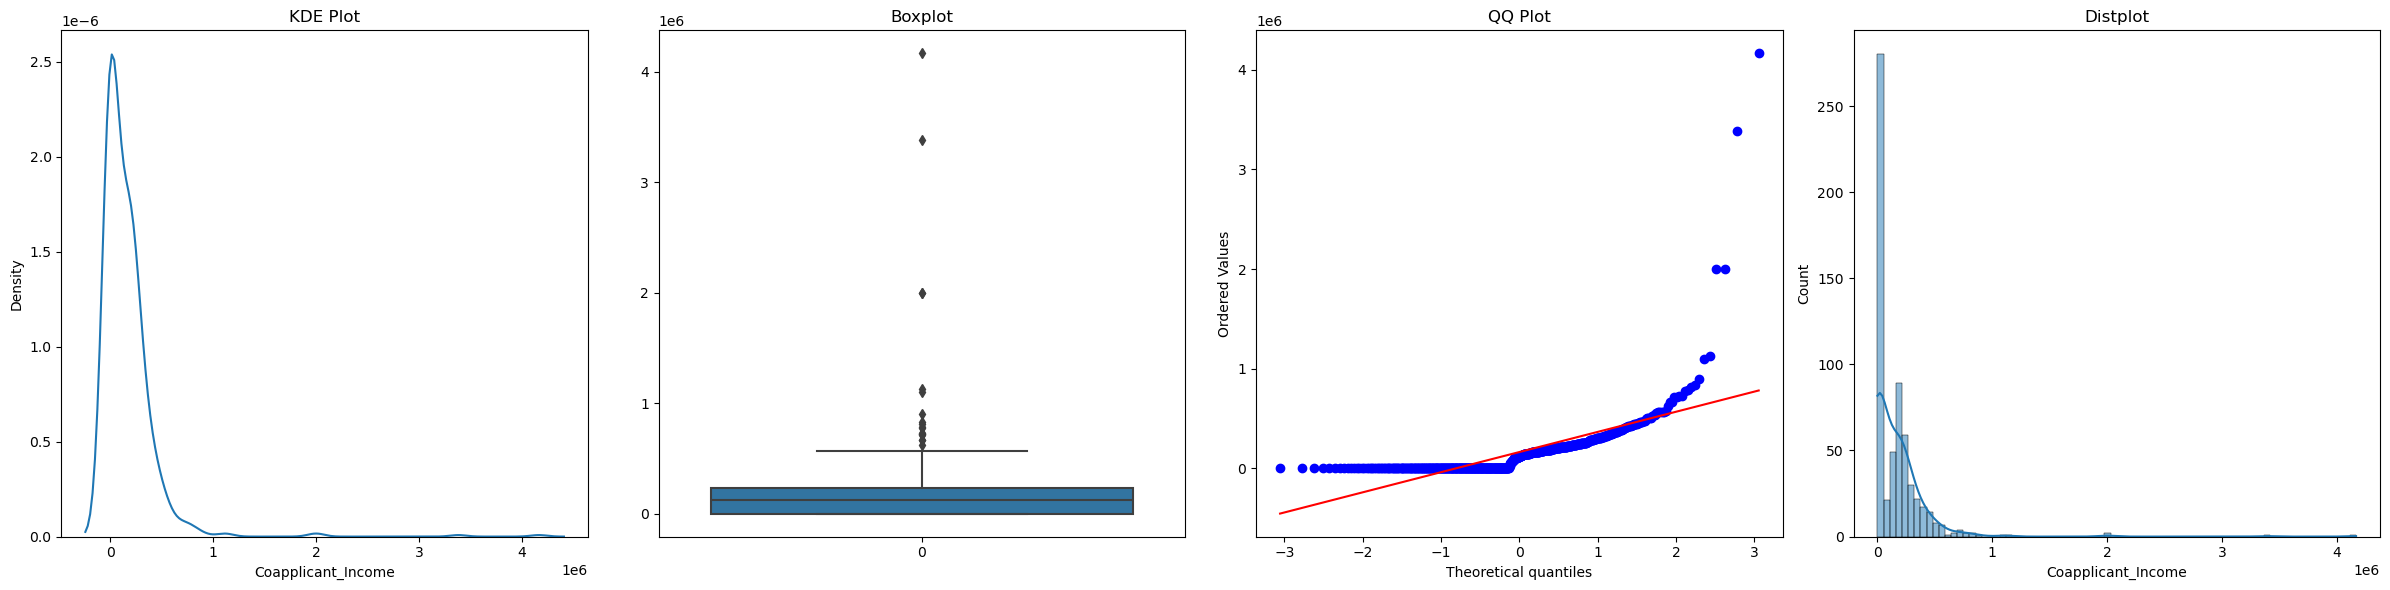

In [231]:
data = df['Coapplicant_Income']

# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# KDE plot
sns.kdeplot(data, ax=axes[0])
axes[0].set_title('KDE Plot')

# Boxplot
sns.boxplot(data, ax=axes[1])
axes[1].set_title('Boxplot')

# QQ plot
stats.probplot(data, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('r')
axes[2].set_title('QQ Plot')

# Distplot
sns.histplot(data, kde=True, ax=axes[3])
axes[3].set_title('Distplot')

plt.tight_layout()
plt.show()


In [232]:
percentile25=df['Coapplicant_Income'].quantile(0.25)
percentile75=df['Coapplicant_Income'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile75-1.5*iqr

In [233]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 574312.5
Lower limit -114862.5


In [234]:
new_df=df.copy()
new_df['Loan_Amount'] = np.where(
    new_df['Loan_Amount'] > upper_limit,
    upper_limit,
    np.where(
        new_df['Loan_Amount'] < lower_limit,
        lower_limit,
        new_df['Loan_Amount']
    )
)

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


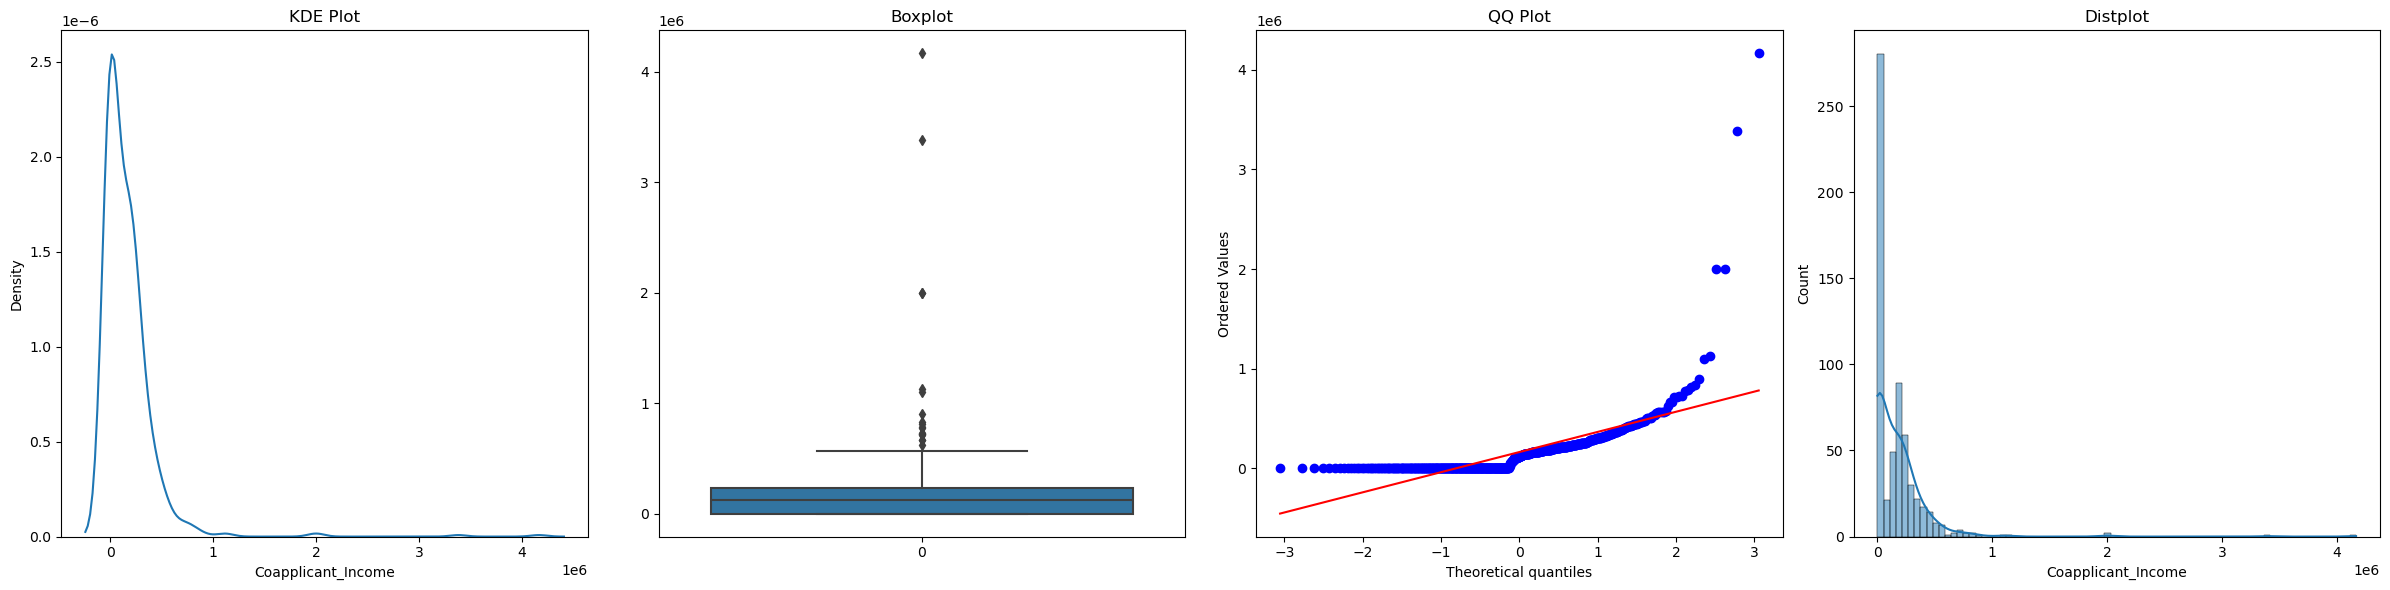

In [235]:
data = new_df['Coapplicant_Income']

# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# KDE plot
sns.kdeplot(data, ax=axes[0])
axes[0].set_title('KDE Plot')

# Boxplot
sns.boxplot(data, ax=axes[1])
axes[1].set_title('Boxplot')

# QQ plot
stats.probplot(data, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('r')
axes[2].set_title('QQ Plot')

# Distplot
sns.histplot(data, kde=True, ax=axes[3])
axes[3].set_title('Distplot')

plt.tight_layout()
plt.show()


# train test split model evaluation


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int64  
 1   Married             614 non-null    int64  
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    int64  
 4   Self_Employed       614 non-null    int64  
 5   Applicant_Income    614 non-null    float64
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    float64
 8   Term                614 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    int64  
 11  Status              614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [237]:
df['Credit_History'].fillna(mode_value, inplace=True)

In [238]:
df.sample()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
557,1,1,3,1,1,1013900.0,0.0,26000000.0,360.0,1.0,2,1


In [239]:
NUM=['Applicant_Income','Loan_Amount','Credit_History','Term']
x=df[['Applicant_Income','Loan_Amount','Credit_History','Term']]
y=df['Status']


In [240]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import VotingClassifier,StackingClassifier

In [241]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [242]:
X_train.shape

(491, 4)

In [243]:
X_train.isna().sum()

Applicant_Income    0
Loan_Amount         0
Credit_History      0
Term                0
dtype: int64

In [244]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
cols_to_be_le=['Gender','Married','Education','Self_Employed','Area']
transformer = ColumnTransformer(transformers=[
    #('col_le', OneHotEncoder(handle_unknown="ignore",sparse=False),cols_to_be_le),
    ('standard',MinMaxScaler(),NUM)
    
    
],remainder='passthrough')

In [245]:
X_train['Credit_History'].isna().sum()

0

In [246]:
X_train_trans=transformer.fit_transform(X_train)

In [247]:
X_test_trans=transformer.transform(X_test)

In [248]:
X_test_trans

array([[0.8756641 , 0.81585518, 1.        , 0.74358974],
       [0.33033419, 0.32646692, 1.        , 0.74358974],
       [0.313996  , 0.46629213, 1.        , 0.74358974],
       [0.16923736, 0.03183521, 1.        , 0.74358974],
       [0.1484433 , 0.02684145, 1.        , 0.74358974],
       [0.04150243, 0.21161049, 1.        , 0.74358974],
       [0.26258212, 0.27652934, 1.        , 0.74358974],
       [0.18066267, 0.00686642, 1.        , 0.74358974],
       [0.14033133, 0.5411985 , 1.        , 0.74358974],
       [0.        , 0.22659176, 1.        , 0.74358974],
       [0.40916881, 0.03682896, 0.        , 0.74358974],
       [0.18237646, 0.44132335, 1.        , 0.74358974],
       [0.07452157, 0.14669164, 1.        , 1.        ],
       [0.24932876, 0.        , 1.        , 0.74358974],
       [0.21676664, 0.11672909, 1.        , 0.74358974],
       [0.18214796, 0.15168539, 1.        , 0.61538462],
       [0.12113682, 0.        , 1.        , 0.74358974],
       [0.39123108, 0.43133583,

In [249]:
models=[RandomForestClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        GradientBoostingClassifier(),
        KNeighborsClassifier(),
        LogisticRegression(),
        SGDClassifier(),
        SVC(),
        DummyClassifier(),
        DecisionTreeClassifier(),
        ExtraTreeClassifier()]

In [250]:
import time
Name=[]
Accuracy=[]
Precision=[]
Recall=[]
Time_Taken=[]
for model in models:
    Name.append(type(model).__name__)
    begin=time.time()
    model.fit(X_train_trans,y_train)
    prediction=model.predict(X_test_trans)
    end=time.time()
    accuracyscore=accuracy_score(prediction,y_test)
    Accuracy.append(accuracyscore)
    precisionScore = precision_score(prediction,y_test)
    Precision.append(precisionScore)
    recallScore = recall_score(prediction,y_test)
    Recall.append(recallScore)
    Time_Taken.append(end-begin)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [251]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict).sort_values('Accuracy',ascending=False)
model_df

,Name,Accuracy,Recall,Precision,Time Taken
5,LogisticRegression,0.788618,0.759615,0.9875,0.004005
6,SGDClassifier,0.788618,0.759615,0.9875,0.004533
7,SVC,0.788618,0.759615,0.9875,0.011532
1,AdaBoostClassifier,0.772358,0.754902,0.9625,0.078387
4,KNeighborsClassifier,0.772358,0.765306,0.9375,0.009957
0,RandomForestClassifier,0.731707,0.758242,0.8625,0.153614
3,GradientBoostingClassifier,0.715447,0.741935,0.8625,0.111895
9,DecisionTreeClassifier,0.715447,0.752809,0.8375,0.001000
2,BaggingClassifier,0.699187,0.747126,0.8125,0.030586
10,ExtraTreeClassifier,0.658537,0.715909,0.7875,0.001014


In [252]:
model = LogisticRegression()
model.fit(X_train_trans, y_train)

LogisticRegression()

In [253]:
# voting classifier

In [254]:
lr=LogisticRegression()

In [255]:
ada=AdaBoostClassifier()

In [256]:
svc=SVC(probability=True)

In [257]:
voting=VotingClassifier(estimators=[('lr',lr),('ada',ada),('svc',svc)],voting='soft')

In [258]:
voting.fit(X_train_trans,y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('ada', AdaBoostClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [259]:
y_pred=voting.predict(X_test_trans)

In [260]:
print( 'acc',accuracy_score(y_pred,y_test))
print( 'p',precision_score(y_pred,y_test))

acc 0.7886178861788617
p 0.9875


In [261]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [262]:
transformer.fit_transform(df)

array([[0.5061696658097686, 0.4263420724094882, 1.0, ..., 0.0, 1, 1],
       [0.36152527849185956, 0.31647940074906367, 1.0, ..., 150800.0, 0,
        0],
       [0.1806626678091974, 0.006866416978776546, 1.0, ..., 0.0, 1, 1],
       ...,
       [0.7601542416452443, 0.9406991260923845, 1.0, ..., 24000.0, 1, 1],
       [0.7042844901456727, 0.6111111111111112, 1.0, ..., 0.0, 1, 1],
       [0.36152527849185956, 0.34144818976279656, 0.0, ..., 0.0, 2, 0]],
      dtype=object)

In [263]:

stacking=StackingClassifier(estimators=[('lr',lr),('ada',ada),('svc',svc)],final_estimator=RandomForestClassifier())

In [264]:
stacking.fit(X_train_trans,y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('ada', AdaBoostClassifier()),
                               ('svc', SVC(probability=True))],
                   final_estimator=RandomForestClassifier())

In [265]:
y_pred=stacking.predict(X_test_trans)

In [266]:
print( 'acc',accuracy_score(y_pred,y_test))
print( 'p',precision_score(y_pred,y_test))

acc 0.7479674796747967
p 0.925


In [267]:
result=cross_val_score(stacking,X_train,y_train,cv=5,n_jobs=-1)
result.mean()

0.7555143269428983

#  


In [268]:
X_train.dtypes

Applicant_Income    float64
Loan_Amount         float64
Credit_History      float64
Term                float64
dtype: object

In [269]:
NUM=['Applicant_Income','Loan_Amount','Credit_History','Term']
x=df[['Applicant_Income','Loan_Amount','Credit_History','Term']]
y=df['Status']

In [270]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [271]:
base_models = [
    ('lr', LogisticRegression()),
    ('ada', AdaBoostClassifier()),
    ('svc',SVC())
]
final_estimator = RandomForestClassifier()

In [272]:
stacking_regressor = StackingClassifier(estimators=base_models, final_estimator=final_estimator)


In [273]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('stacking', stacking_regressor)
])

In [274]:
pipeline.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

Pipeline(steps=[('scaler', StandardScaler()),
                ('stacking',
                 StackingClassifier(estimators=[('lr', LogisticRegression()),
                                                ('ada', AdaBoostClassifier()),
                                                ('svc', SVC())],
                                    final_estimator=RandomForestClassifier()))])

In [275]:
y_pred = pipeline.predict(X_test)

In [276]:
print( 'acc',accuracy_score(y_pred,y_test))
print( 'p',precision_score(y_pred,y_test))

acc 0.7723577235772358
p 0.95


In [277]:
result=cross_val_score(stacking,X_train,y_train,cv=5,n_jobs=-1)
result.mean()

0.788126159554731

In [278]:
import pickle
pickle.dump(pipeline,open('model_stacking.pkl','wb'))

In [279]:
X_train.sample()

,Applicant_Income,Loan_Amount,Credit_History,Term
280,405300.0,15800000.0,0.0,360.0


In [280]:
X_train.describe()

,Applicant_Income,Loan_Amount,Credit_History,Term
count,4.910000e+02,4.910000e+02,491.000000,491.000000
mean,4.739753e+05,1.384610e+07,0.857434,340.765784
std,2.524760e+05,5.685182e+06,0.349986,66.944023
min,1.418750e+05,6.462500e+06,0.000000,12.000000
25%,2.918500e+05,1.000000e+07,1.000000,360.000000
50%,3.900000e+05,1.280000e+07,1.000000,360.000000
75%,5.938000e+05,1.650000e+07,1.000000,360.000000
max,1.017125e+06,2.648750e+07,1.000000,480.000000


In [281]:
df[['Applicant_Income','Loan_Amount','Credit_History','Term']].sample()

,Applicant_Income,Loan_Amount,Credit_History,Term
310,291700.0,8400000.0,1.0,360.0


In [283]:
df['Credit_History'].unique()

array([1., 0.])